<a href="https://colab.research.google.com/github/Alaaibrahim2/Alaa/blob/main/Pytorch_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

%matplotlib inline

In [39]:
raw = pd.read_csv(
    filepath_or_buffer="https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv"
)

In [40]:
raw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [41]:
raw.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


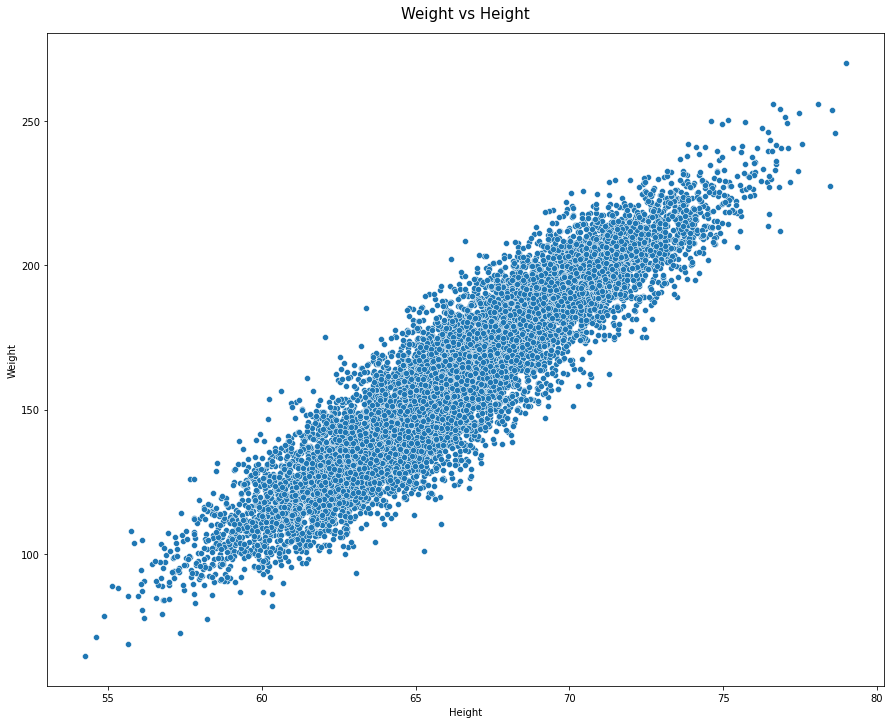

In [42]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.scatterplot(data=raw, x="Height", y="Weight")
ax.set_title(label="Weight vs Height", fontdict=dict(size=15), pad=15)

plt.show()

In [43]:
data = raw.copy(deep=True)

In [44]:
height_scaler = StandardScaler()
weight_scaler = StandardScaler()

data["Height"] = height_scaler.fit_transform(data["Height"].to_numpy().reshape(-1, 1)).flatten()
data["Weight"] = weight_scaler.fit_transform(data["Weight"].to_numpy().reshape(-1, 1)).flatten()

In [45]:
X = data["Height"]
y = data["Weight"]

In [46]:
X = X.to_numpy()
y = y.to_numpy()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000,), (8000,), (2000,), (2000,))

In [49]:
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [50]:
X_train.shape, X_test.shape

(torch.Size([8000]), torch.Size([2000]))

In [51]:
X_train, X_test = X_train.unsqueeze(1), X_test.unsqueeze(1)
X_train.shape, X_test.shape

(torch.Size([8000, 1]), torch.Size([2000, 1]))

In [52]:
batch_size = 32

In [53]:
W = torch.randn((1, 1), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)

In [54]:
X_train_sample, y_train_sample = X_train[:batch_size], y_train[:batch_size]

In [55]:
output_sample = torch.matmul(X_train_sample, W) + b
output_sample.shape

torch.Size([32, 1])

In [56]:
def mse(output,target:torch.Tensor) -> torch.Tensor:
  residuals=target-output 
  return torch.mean(torch.square(residuals))

In [57]:
loss=mse(output_sample,y_train_sample)

In [58]:
loss

tensor(1.6989, grad_fn=<MeanBackward0>)

In [59]:
loss.backward

<bound method Tensor.backward of tensor(1.6989, grad_fn=<MeanBackward0>)>

In [60]:
W.grad.zero_(),b.grad.zero_()

AttributeError: ignored

In [61]:
epochs = 15
lr = 5e-5

In [62]:
W = torch.randn((1, 1), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)

num_batches = len(X_train) // batch_size

for epoch in range(epochs):
    epoch_loss = 0
    for batch_idx in range(num_batches):
        ## TODO: Move to batches
        inputs = X_train[batch_idx * batch_size: (batch_idx + 1) * batch_size]
        target = y_train[batch_idx * batch_size: (batch_idx + 1) * batch_size]
        
        output = torch.matmul(inputs, W) + b
        
        loss = mse(output=output, target=target)
        
        loss.backward()
        
        # While updating weights, we want to PyTorch to stop following the graph operations
        with torch.no_grad():
            # Set learning rate to 1e-5
            W -= W.grad * lr
            b -= b.grad * lr
            
            W.grad.zero_()
            b.grad.zero_()
            
        epoch_loss += loss.item()
        
    
    print(f"Epoch {epoch + 1}: Loss = {epoch_loss / len(X_train)}")

Epoch 1: Loss = 0.20936450839042664
Epoch 2: Loss = 0.2006908559501171
Epoch 3: Loss = 0.19243951949477195
Epoch 4: Loss = 0.1845899089872837
Epoch 5: Loss = 0.17712252056598662
Epoch 6: Loss = 0.17001874977350234
Epoch 7: Loss = 0.16326069051027298
Epoch 8: Loss = 0.15683178892731667
Epoch 9: Loss = 0.15071599525213242
Epoch 10: Loss = 0.1448979806303978
Epoch 11: Loss = 0.1393632524907589
Epoch 12: Loss = 0.13409795686602594
Epoch 13: Loss = 0.12908905532956122
Epoch 14: Loss = 0.1243240894973278
Epoch 15: Loss = 0.1197910823225975


In [63]:
predictions = torch.matmul(X_test, W) + b
def visualize_predictions(X_test, y_test, predictions):
    
    preds = weight_scaler.inverse_transform(predictions.detach().numpy())
    actual = weight_scaler.inverse_transform(y_test.numpy().reshape((-1, 1)))
    inputs = weight_scaler.inverse_transform(X_test.numpy().reshape((-1, 1)))

    fig, ax = plt.subplots(figsize=(15, 12))

    sns.scatterplot(x=inputs.flatten(), y=preds.flatten(), ax=ax, color="blue")
    sns.scatterplot(x=inputs.flatten(), y=actual.flatten(), ax=ax, color="orange")
 
    plt.legend()

    ax.set_xlabel("Height", fontdict={"size": 12}, labelpad=12)
    ax.set_ylabel("Weight", fontdict={"size": 12}, labelpad=12)

    fig.show()


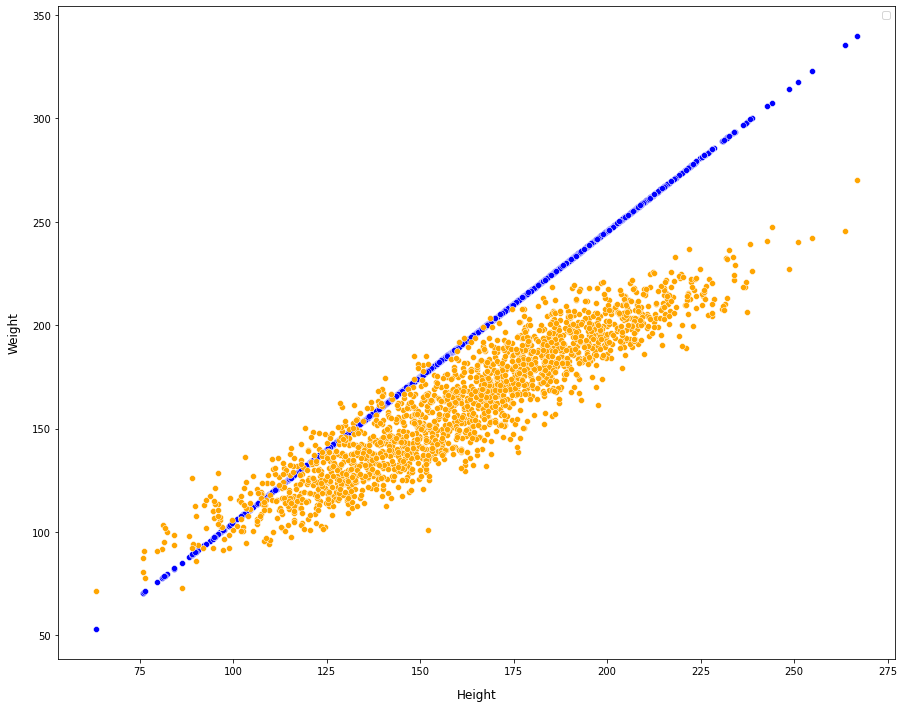

In [64]:
visualize_predictions(X_test, y_test, predictions)